## Liberary importing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import data

In [2]:
last_review_df = pd.read_csv('airbnb_last_review.tsv', sep='\t')
price_df = pd.read_csv('airbnb_price.csv')
room_type_df = pd.read_excel('airbnb_room_type.xlsx')

In [3]:
room_type_df.head()

,listing_id,description,room_type
0,2595,Skylit Midtown Castle,Entire home/apt
1,3831,Cozy Entire Floor of Brownstone,Entire home/apt
2,5099,Large Cozy 1 BR Apartment In Midtown East,Entire home/apt
3,5178,Large Furnished Room Near B'way,private room
4,5238,Cute & Cozy Lower East Side 1 bdrm,Entire home/apt


In [4]:
price_df.head()

,listing_id,price,nbhood_full
0,2595,225 dollars,"Manhattan, Midtown"
1,3831,89 dollars,"Brooklyn, Clinton Hill"
2,5099,200 dollars,"Manhattan, Murray Hill"
3,5178,79 dollars,"Manhattan, Hell's Kitchen"
4,5238,150 dollars,"Manhattan, Chinatown"


In [5]:
room_type_df.head()

,listing_id,description,room_type
0,2595,Skylit Midtown Castle,Entire home/apt
1,3831,Cozy Entire Floor of Brownstone,Entire home/apt
2,5099,Large Cozy 1 BR Apartment In Midtown East,Entire home/apt
3,5178,Large Furnished Room Near B'way,private room
4,5238,Cute & Cozy Lower East Side 1 bdrm,Entire home/apt


In [6]:
print('The shape of last_review_df is', last_review_df.shape)
print('The shape of price_df is', price_df.shape)
print('The shape of room_type_df is', room_type_df.shape)

The shape of last_review_df is (25209, 3)
The shape of price_df is (25209, 3)
The shape of room_type_df is (25209, 3)


## Merging Data

In [7]:
#Merge last_review_df with room_type_df using listing_id as the primery key
df = last_review_df.merge(room_type_df, on='listing_id')
df.head()

,listing_id,host_name,last_review,description,room_type
0,2595,Jennifer,May 21 2019,Skylit Midtown Castle,Entire home/apt
1,3831,LisaRoxanne,July 05 2019,Cozy Entire Floor of Brownstone,Entire home/apt
2,5099,Chris,June 22 2019,Large Cozy 1 BR Apartment In Midtown East,Entire home/apt
3,5178,Shunichi,June 24 2019,Large Furnished Room Near B'way,private room
4,5238,Ben,June 09 2019,Cute & Cozy Lower East Side 1 bdrm,Entire home/apt


In [8]:
#Merge df with price_df using listing_id as the primery key
df = df.merge(price_df, on='listing_id')
df.head()

,listing_id,host_name,last_review,description,room_type,price,nbhood_full
0,2595,Jennifer,May 21 2019,Skylit Midtown Castle,Entire home/apt,225 dollars,"Manhattan, Midtown"
1,3831,LisaRoxanne,July 05 2019,Cozy Entire Floor of Brownstone,Entire home/apt,89 dollars,"Brooklyn, Clinton Hill"
2,5099,Chris,June 22 2019,Large Cozy 1 BR Apartment In Midtown East,Entire home/apt,200 dollars,"Manhattan, Murray Hill"
3,5178,Shunichi,June 24 2019,Large Furnished Room Near B'way,private room,79 dollars,"Manhattan, Hell's Kitchen"
4,5238,Ben,June 09 2019,Cute & Cozy Lower East Side 1 bdrm,Entire home/apt,150 dollars,"Manhattan, Chinatown"


In [9]:
df.shape

(25209, 7)

After merging, our main dataframe `df` has 7 columns and 25209 rows/records.

## Data cleaning

In [10]:
#checking datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25209 entries, 0 to 25208
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   listing_id   25209 non-null  int64 
 1   host_name    25201 non-null  object
 2   last_review  25209 non-null  object
 3   description  25199 non-null  object
 4   room_type    25209 non-null  object
 5   price        25209 non-null  object
 6   nbhood_full  25209 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.3+ MB


We have 2 issues here regarding datatypes, `price` and `last_review` columns have incorrect data types.
- `price` should be intger.
- `last_review` should be data.

#### Fixing Datatypes

In [11]:
#check `price` column values
df['price'].head()

0    225 dollars
1     89 dollars
2    200 dollars
3     79 dollars
4    150 dollars
Name: price, dtype: object

There is a string 'dollars' besides the price, that is what casued the incorrect datatype of the `price` column.

In [12]:
#splitting the price column to price and currancy
df[['price','currancy']] = df['price'].str.split(' ',expand=True)


In [13]:
df.head()

,listing_id,host_name,last_review,description,room_type,price,nbhood_full,currancy
0,2595,Jennifer,May 21 2019,Skylit Midtown Castle,Entire home/apt,225,"Manhattan, Midtown",dollars
1,3831,LisaRoxanne,July 05 2019,Cozy Entire Floor of Brownstone,Entire home/apt,89,"Brooklyn, Clinton Hill",dollars
2,5099,Chris,June 22 2019,Large Cozy 1 BR Apartment In Midtown East,Entire home/apt,200,"Manhattan, Murray Hill",dollars
3,5178,Shunichi,June 24 2019,Large Furnished Room Near B'way,private room,79,"Manhattan, Hell's Kitchen",dollars
4,5238,Ben,June 09 2019,Cute & Cozy Lower East Side 1 bdrm,Entire home/apt,150,"Manhattan, Chinatown",dollars


In [14]:
#checking the currancy unique values
df['currancy'].unique()

array(['dollars'], dtype=object)

In [15]:
#dropping currancy column
df.drop(columns = ['currancy'],inplace=True)
#rename price column to price/usd
df.rename(columns={'price':'price/usd'},inplace=True)
#convert price from object to int
df['price/usd']= df['price/usd'].astype('int')
df.head()

,listing_id,host_name,last_review,description,room_type,price/usd,nbhood_full
0,2595,Jennifer,May 21 2019,Skylit Midtown Castle,Entire home/apt,225,"Manhattan, Midtown"
1,3831,LisaRoxanne,July 05 2019,Cozy Entire Floor of Brownstone,Entire home/apt,89,"Brooklyn, Clinton Hill"
2,5099,Chris,June 22 2019,Large Cozy 1 BR Apartment In Midtown East,Entire home/apt,200,"Manhattan, Murray Hill"
3,5178,Shunichi,June 24 2019,Large Furnished Room Near B'way,private room,79,"Manhattan, Hell's Kitchen"
4,5238,Ben,June 09 2019,Cute & Cozy Lower East Side 1 bdrm,Entire home/apt,150,"Manhattan, Chinatown"


In [45]:
#fixing last_review datatype
df['last_review'] = pd.to_datetime(df['last_review'])

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25198 entries, 0 to 25208
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   listing_id     25198 non-null  int64         
 1   host_name      25198 non-null  object        
 2   last_review    25198 non-null  datetime64[ns]
 3   description    25198 non-null  object        
 4   room_type      25198 non-null  object        
 5   price/usd      25198 non-null  int32         
 6   boroughs       25198 non-null  object        
 7   neighbourhood  25198 non-null  object        
dtypes: datetime64[ns](1), int32(1), int64(1), object(5)
memory usage: 1.6+ MB


---

In [18]:
# checking for duplicates
df.duplicated().sum()

0

In [19]:
#checking for null values
df.isna().sum()

listing_id      0
host_name       8
last_review     0
description    10
room_type       0
price/usd       0
nbhood_full     0
dtype: int64

There is no null values except for, `host_name` which has 8 null values and `description` which has 10 null values.
Since the number or the null values as very few, we can concider droping them, but i prefare imputing them with other values.
- For the `host_name` column, we can impute it with the most frequent name.
- For the `description` column, we will impute it with another placeholder 'no description provided'

#### Imputing null values

In [20]:
#handling null values in `host_name` column
df['host_name'].fillna(df['host_name'].mode()[0], inplace=True)

In [21]:
#handling null values in `description` column
df['description'].fillna('No description provide',inplace=True)

In [22]:
df.isna().sum()

listing_id     0
host_name      0
last_review    0
description    0
room_type      0
price/usd      0
nbhood_full    0
dtype: int64

---

In [23]:
#checking unique values in the root_type columns
df['room_type'].value_counts()

room_type
Entire home/apt    8458
Private room       7241
entire home/apt    2665
private room       2248
ENTIRE HOME/APT    2143
PRIVATE ROOM       1867
Shared room         380
shared room         110
SHARED ROOM          97
Name: count, dtype: int64

It's clear that `room_type` has only 3 unique values (Entire home/apt ,Private room ,Shared room ), however the inconsistancy in the data entry formate is the reason behind the incorrect number of unique values.

In [24]:
df['room_type'] = df['room_type'].str.capitalize()
df['room_type'].value_counts()

room_type
Entire home/apt    13266
Private room       11356
Shared room          587
Name: count, dtype: int64

---

In [25]:
# Describe to get an overview of the price distribution
df['price/usd'].describe()

count    25209.000000
mean       141.777936
std        147.349137
min          0.000000
25%         69.000000
50%        105.000000
75%        175.000000
max       7500.000000
Name: price/usd, dtype: float64

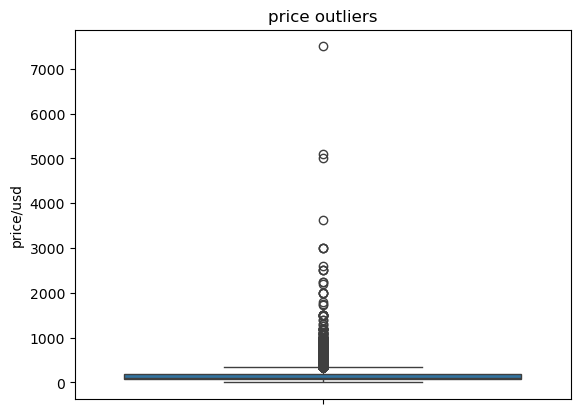

In [26]:
#visualizing outliers using boxplot
sns.boxplot(df['price/usd'])
plt.title('price outliers');

#### observations
- The minimum value is $0, which is unresonable for rental price
- The mean is higher than the medium, which suggest right skewed data
- The maximum is significantly higher that the 75th percentile

In [27]:
#investigating the $0 rental price
df[df['price/usd']==0]

,listing_id,host_name,last_review,description,room_type,price/usd,nbhood_full
10861,20333471,Anisha,2019-06-24,‚òÖHostel Style Room | Ideal Traveling Buddies‚òÖ,Private room,0,"Bronx, East Morrisania"
10958,20523843,Martial Loft,2019-05-18,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",Private room,0,"Brooklyn, Bushwick"
11023,20639628,Adeyemi,2019-06-15,Spacious comfortable master bedroom with nice ...,Private room,0,"Brooklyn, Bedford-Stuyvesant"
11024,20639792,Adeyemi,2019-06-21,Contemporary bedroom in brownstone with nice view,Private room,0,"Brooklyn, Bedford-Stuyvesant"
11025,20639914,Adeyemi,2019-06-23,Cozy yet spacious private brownstone bedroom,Private room,0,"Brooklyn, Bedford-Stuyvesant"
11577,21291569,Sergii,2019-06-22,Coliving in Brooklyn! Modern design / Shared room,Shared room,0,"Brooklyn, Bushwick"
11589,21304320,Sergii,2019-05-24,Best Coliving space ever! Shared room.,Shared room,0,"Brooklyn, Bushwick"


There is a few records with $0 pricing, which suggest that is a one thing compensation, or data entry mistake.
It's more save to drop these records so it won't affect our analysis.

In [28]:
#dropping rows with $0 rental price
df=df[df['price/usd']>0]
df[df['price/usd']==0]

,listing_id,host_name,last_review,description,room_type,price/usd,nbhood_full


In [29]:
#investigating rooms with price higher than 75th precentile
#calculating the IQR
iqr = 175 - 69
upper_bound = 175 + 1.5 * iqr
upper_bound

334.0

In [30]:
#investigating rooms with price higher than the upper bound
df_upper = df[df['price/usd']>upper_bound]
print(df_upper.shape)
df_upper.head()

(1326, 7)


,listing_id,host_name,last_review,description,room_type,price/usd,nbhood_full
78,23686,Ann,2019-05-18,2000 SF 3br 2bath West Village private townhouse,Entire home/apt,500,"Manhattan, West Village"
128,45910,Mark,2019-05-12,Beautiful Queens Brownstone! - 5BR,Entire home/apt,350,"Queens, Ridgewood"
168,60164,Harrison,2019-06-23,"Beautiful, elegant 3 bed SOHO loft",Entire home/apt,500,"Manhattan, SoHo"
191,63693,Olivia,2019-06-19,Cottage in the Village,Entire home/apt,390,"Manhattan, East Village"
220,68974,Alicia,2019-06-20,Unique spacious loft on the Bowery,Entire home/apt,575,"Manhattan, Little Italy"


In [31]:
#investigating shared rooms with price higher than the upper bound
df_upper[df_upper['room_type']=='Shared room']

,listing_id,host_name,last_review,description,room_type,price/usd,nbhood_full
10484,19791460,Stephen,2019-01-11,2nd Street Sanctuary,Shared room,350,"Manhattan, East Village"
17376,29078251,Dc,2019-06-27,"Park Avenue midtown apartment, walk to everything",Shared room,800,"Manhattan, Murray Hill"


In [32]:
df[(df['room_type']=='Shared room') & ((df['nbhood_full'] == 'Manhattan, East Village') | (df['nbhood_full'] == 'Manhattan, Murray Hill'))]

,listing_id,host_name,last_review,description,room_type,price/usd,nbhood_full
3970,6145637,Alexandra,2019-06-02,SPACE IN APT IN PERFECT LOCATION,Shared room,77,"Manhattan, East Village"
7080,13726934,Chris,2019-05-19,East Village Manhattan NYC Sofas!,Shared room,30,"Manhattan, East Village"
10484,19791460,Stephen,2019-01-11,2nd Street Sanctuary,Shared room,350,"Manhattan, East Village"
10900,20409753,Carol,2019-04-24,COZY NEST/Coffee and Bagel,Shared room,69,"Manhattan, East Village"
11034,20652620,Mizue,2019-06-27,Single Bed A in Sharing Room near Grand Central,Shared room,49,"Manhattan, Murray Hill"
11035,20652753,Mizue,2019-06-25,Single Bed B in Sharing room near Grand Central,Shared room,49,"Manhattan, Murray Hill"
11224,20882090,Haley,2019-05-20,Living room available! Modern apartment in mid...,Shared room,120,"Manhattan, Murray Hill"
11817,21558456,Sibel,2019-05-22,"Midtown-Luxury-Safe! \nNearby UN, NYU & Bellevue.",Shared room,150,"Manhattan, Murray Hill"
12560,22309616,Julio,2019-06-30,"Cool and Cozy living room, confortable couch .",Shared room,42,"Manhattan, East Village"
13209,23361038,Ahmad,2019-06-04,Sofa Bed in middle of East Village (St marks),Shared room,75,"Manhattan, East Village"


In [33]:
df.head()

,listing_id,host_name,last_review,description,room_type,price/usd,nbhood_full
0,2595,Jennifer,2019-05-21,Skylit Midtown Castle,Entire home/apt,225,"Manhattan, Midtown"
1,3831,LisaRoxanne,2019-07-05,Cozy Entire Floor of Brownstone,Entire home/apt,89,"Brooklyn, Clinton Hill"
2,5099,Chris,2019-06-22,Large Cozy 1 BR Apartment In Midtown East,Entire home/apt,200,"Manhattan, Murray Hill"
3,5178,Shunichi,2019-06-24,Large Furnished Room Near B'way,Private room,79,"Manhattan, Hell's Kitchen"
4,5238,Ben,2019-06-09,Cute & Cozy Lower East Side 1 bdrm,Entire home/apt,150,"Manhattan, Chinatown"


Regarding the outlier in the rental price of the shared room, after comparing the price to other rooms in the same nighborhood we suggest that this high price is due to a mistake in the data entry process, maybe extra 0?!

In [34]:
#replacing the outliers with the their value divided by 10
df.loc[(df['price/usd'] == 350) & (df['room_type'] == 'Shared room'), 'price/usd'] = 35
df.loc[(df['price/usd'] == 800) & (df['room_type'] == 'Shared room'), 'price/usd'] = 80

In [35]:
pd.set_option('display.max_row',100)
#investigating private rooms with price higher than the upper bound
df_upper[df_upper['room_type']=='Private room']

,listing_id,host_name,last_review,description,room_type,price/usd,nbhood_full
243,80700,The Box House Hotel,2019-05-24,Loft w/ Terrace @ Box House Hotel,Private room,349,"Brooklyn, Greenpoint"
440,241140,Jessica,2019-04-14,The Notorious B.N.B. { The Wallace },Private room,438,"Brooklyn, Clinton Hill"
1320,992598,Sascha,2019-05-29,"Village Life, 2-Bedroom, East Village",Private room,420,"Manhattan, East Village"
2318,2669352,Rebecca,2019-06-08,Cozy 3 bedroom on upper west side,Private room,425,"Manhattan, Upper West Side"
7921,15392689,Diane,2019-01-27,"Private, Spacious Bedroom in Harlem, single bed",Private room,1500,"Manhattan, East Harlem"
8016,15537258,Sean,2019-01-05,889 Bushwick Ave,Private room,2000,"Brooklyn, Bushwick"
8082,15704180,Jessica,2019-07-03,ARTIST LOFT in WILLIAMSBURG,Private room,350,"Brooklyn, Williamsburg"
8860,16870827,Clell,2019-06-27,Private Lrg bedroom in a convrtable 2 Bed Apt.,Private room,800,"Brooklyn, Bay Ridge"
9366,17879131,Pablo,2019-06-17,Amazing Space For Your Chelsea Stay,Private room,429,"Manhattan, Chelsea"
9783,18649351,Ana Y Victor,2019-05-08,"BEST LOCATION, ONLY 5 MIN TO MANHATAN.",Private room,400,"Brooklyn, Williamsburg"


After checking the rental price of the 34895693 record on the Airbnb website, we found that 7500 is not a resonable price. So we are gonna drop this record.

In [36]:
df.drop(23916, inplace = True)

In [37]:
df[(df['room_type'] == 'Entire home/apt') & (df['price/usd'] > 3000)]

,listing_id,host_name,last_review,description,room_type,price/usd,nbhood_full
18430,30035166,Rasmus,2019-02-23,4-Floor Unique Event Space 50P Cap. - #10299B,Entire home/apt,5000,"Manhattan, Harlem"
21731,33029434,Sally,2019-06-15,West 84th Street by (Hidden by Airbnb),Entire home/apt,3613,"Manhattan, Upper West Side"
22085,33397385,Debra,2019-06-22,Midtown Manhattan great location (Gramacy park),Entire home/apt,5100,"Manhattan, Midtown"


In [38]:
df.drop(df[(df['room_type'] == 'Entire home/apt') & (df['price/usd'] > 3000)].index,inplace = True)

In [39]:
df.shape

(25198, 7)

---

In [40]:
#expanding nbhood_full column to boroughs, neighbourhood
df[['boroughs','neighbourhood']] = df['nbhood_full'].str.split(',',n=1,expand=True)

In [41]:
df['neighbourhood'] = df['neighbourhood'].str.strip()

In [42]:
df.drop(columns = ['nbhood_full'],inplace=True)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25198 entries, 0 to 25208
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   listing_id     25198 non-null  int64         
 1   host_name      25198 non-null  object        
 2   last_review    25198 non-null  datetime64[ns]
 3   description    25198 non-null  object        
 4   room_type      25198 non-null  object        
 5   price/usd      25198 non-null  int32         
 6   boroughs       25198 non-null  object        
 7   neighbourhood  25198 non-null  object        
dtypes: datetime64[ns](1), int32(1), int64(1), object(5)
memory usage: 1.6+ MB


## Exporting cleaned datafram

In [47]:
df.to_csv('cleaned_airbnb_data.csv', index=False)